# Prepare table for real-world experiment

Necessary imports:

In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# combin ethe individual result files
def combine_data():
    my_path= "../results/rw_experiment/"
    files = [f for f in os.listdir(my_path) if 'results' in f]
    exp_list = []
    for file in files:
        experiment = pd.read_csv(my_path+file)
        exp_list.append(experiment)
    experimente = pd.concat(exp_list)
    experimente.to_csv("../results/rw_experiment/combined.csv")

In [3]:
# add column with stratified balance (balance regarding non noise points)
def stratified_balance():
    experiment = pd.read_csv("results/rw_experiment/combined.csv")
    # renaming
    experiment = experiment.replace('FairSC_normalized', 'FairSC (N)')
    experiment = experiment.replace('Fairlet_MCF Fairlet', 'Fairlet (MCF)')
    experiment = experiment.replace('GroundTruth_DB', 'DBSCAN')
    experiment = experiment.replace('adult4', 'Adult (gender)')
    experiment = experiment.replace('adult', 'Adult (race)')
    experiment = experiment.replace('communities', 'Communities')
    experiment = experiment.replace('diabetes', 'Diabetes')
    experiment = experiment.replace('bank3', 'Bank')
    experiment['Stratified'] = experiment['Balance']*(1-experiment['Noise'])
    experiment.to_csv("../results/rw_experiment/stratified_combined.csv")

In [4]:
# read pre-processed file
experiment = pd.read_csv('../results/rw_experiment/stratified_combined.csv')

In [6]:
# pre-process dataframe
results = experiment[experiment['N_cluster']==2.0]
results = results.sort_values(by=['Data','Algorithm'])

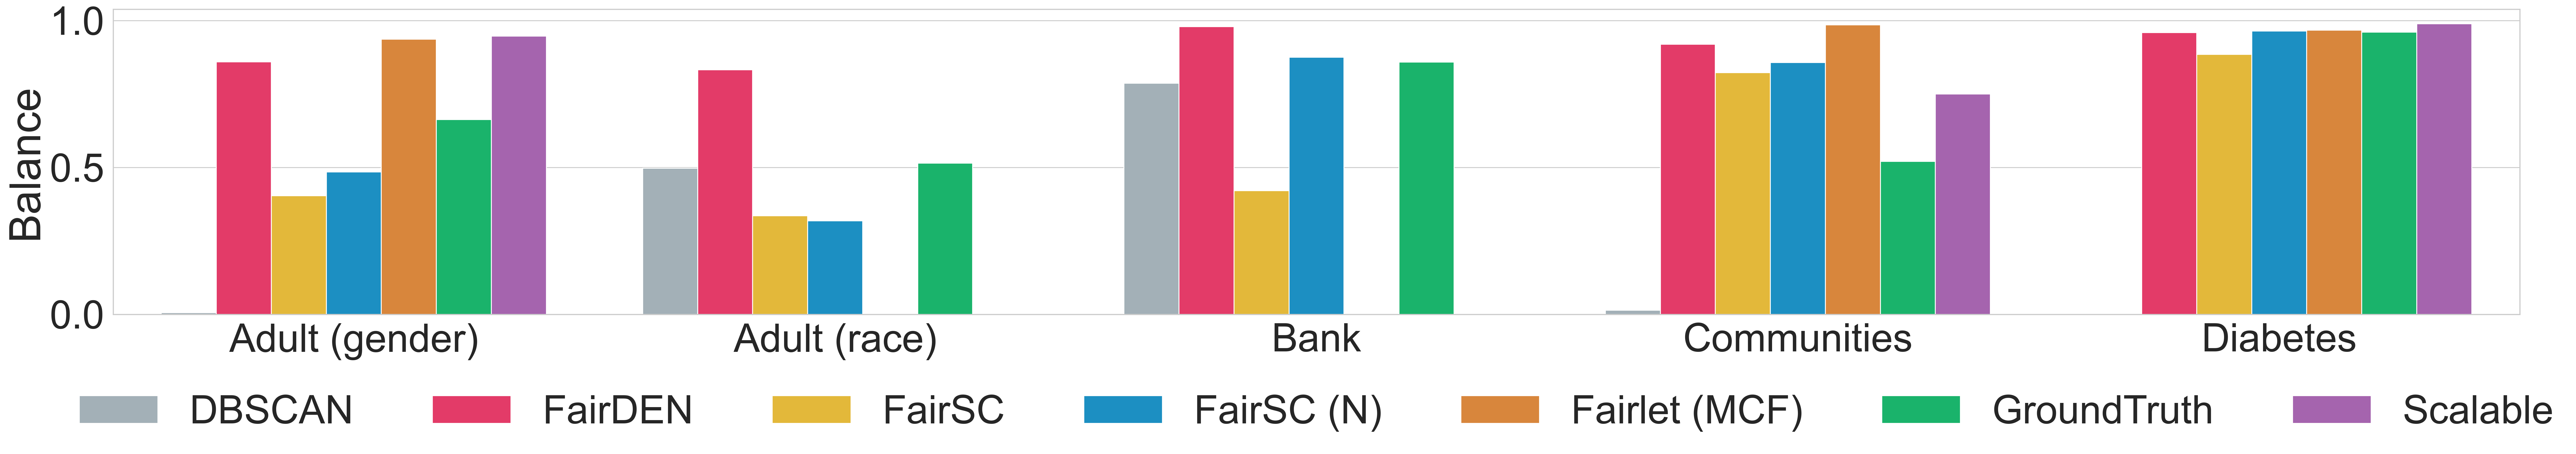

In [7]:
# plot as bar chart
colors = ['#a0b1ba','#FF1F5B','#ffc61e','#009ade','#f28522','#00cd6c','#af58ba']
sns.set(font_scale=3.9)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(47, 6), dpi=300)
p = sns.barplot(results, x="Data", y="Stratified", hue="Algorithm", palette=colors, ax=ax)
sns.set_style("whitegrid")
sns.set(font_scale=3.9)
p.set(xlabel="")
p.set(ylabel="Balance")
sns.move_legend(
    p, "lower center",
    bbox_to_anchor=(.5, -0.5), ncol=7, title=None, frameon=False,
)
p.axvline(0.5, color="grey", linestyle="")
plt.show()

In [36]:
# preprare for table
experiment = experiment.sort_values(by=["Data", "N_cluster","Algorithm"])
experiment = experiment.drop_duplicates()
experiment.rename(columns = {'N_cluster':'k'}, inplace = True)

In [38]:
# print table as latex
table = experiment[["Data", "k","Algorithm","Balance","Stratified","DCSI","ARI","ARI_DB"]]
table['k'] =table['k'].astype(int)
table = table.drop_duplicates()

print(table.to_latex(index=False,
                  float_format="{:.2f}".format,
))

\begin{tabular}{lrlrrrrr}
\toprule
Data & k & Algorithm & Balance & Stratified & DCSI & ARI & ARI_DB \\
\midrule
Adult (gender) & 2 & DBSCAN & 0.71 & 0.01 & 0.97 & 0.00 & 1.00 \\
Adult (gender) & 2 & FairDEN & 0.86 & 0.86 & 0.04 & 0.05 & -0.01 \\
Adult (gender) & 2 & FairSC & 0.40 & 0.40 & 0.00 & 0.23 & -0.01 \\
Adult (gender) & 2 & FairSC (N) & 0.49 & 0.49 & 0.00 & 0.27 & -0.01 \\
Adult (gender) & 2 & Fairlet (MCF) & 0.94 & 0.94 & 0.00 & -0.00 & -0.00 \\
Adult (gender) & 2 & GroundTruth & 0.66 & 0.66 & 0.00 & 1.00 & 0.00 \\
Adult (gender) & 2 & Scalable & 0.95 & 0.95 & 0.01 & -0.01 & -0.00 \\
Adult (race) & 2 & DBSCAN & 0.50 & 0.50 & 0.99 & 0.02 & 1.00 \\
Adult (race) & 2 & FairDEN & 0.83 & 0.83 & 0.09 & 0.05 & 0.01 \\
Adult (race) & 2 & FairSC & 0.34 & 0.34 & 0.00 & -0.03 & -0.00 \\
Adult (race) & 2 & FairSC (N) & 0.32 & 0.32 & 0.00 & 0.16 & 0.01 \\
Adult (race) & 2 & GroundTruth & 0.52 & 0.52 & 0.00 & 1.00 & 0.02 \\
Bank & 2 & DBSCAN & 0.79 & 0.79 & 0.99 & 0.01 & 1.00 \\
Bank & 2 & 

/var/folders/nc/bk5y8hg15dj22klbh0nsdc400000gn/T/ipykernel_18390/2334888368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['k'] =table['k'].astype(int)
